#### https://gallery.azure.ai/Experiment/Predictive-Maintenance-Step-1-of-3-data-preparation-and-feature-engineering-2

#### https://www.kaggle.com/behrad3d/nasa-cmaps

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix,accuracy_score

from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM, Activation
from keras.callbacks import EarlyStopping

import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

Using TensorFlow backend.


In [2]:
dataset_train=pd.read_csv('PM_train.txt',sep=' ',header=None).drop([26,27],axis=1)
col_names = ['id','cycle','setting1','setting2','setting3','s1','s2','s3','s4','s5','s6','s7','s8','s9','s10','s11','s12','s13','s14','s15','s16','s17','s18','s19','s20','s21']
dataset_train.columns=col_names
print('Shape of Train dataset: ',dataset_train.shape)
dataset_train.head()

Shape of Train dataset:  (20631, 26)


id  cycle  setting1  setting2  setting3      s1      s2       s3       s4  \
0   1      1   -0.0007   -0.0004     100.0  518.67  641.82  1589.70  1400.60   
1   1      2    0.0019   -0.0003     100.0  518.67  642.15  1591.82  1403.14   
2   1      3   -0.0043    0.0003     100.0  518.67  642.35  1587.99  1404.20   
3   1      4    0.0007    0.0000     100.0  518.67  642.35  1582.79  1401.87   
4   1      5   -0.0019   -0.0002     100.0  518.67  642.37  1582.85  1406.22   

      s5  ...     s12      s13      s14     s15   s16  s17   s18    s19  \
0  14.62  ...  521.66  2388.02  8138.62  8.4195  0.03  392  2388  100.0   
1  14.62  ...  522.28  2388.07  8131.49  8.4318  0.03  392  2388  100.0   
2  14.62  ...  522.42  2388.03  8133.23  8.4178  0.03  390  2388  100.0   
3  14.62  ...  522.86  2388.08  8133.83  8.3682  0.03  392  2388  100.0   
4  14.62  ...  522.19  2388.04  8133.80  8.4294  0.03  393  2388  100.0   

     s20      s21  
0  39.06  23.4190  
1  39.00  23.4236  
2  38.95  23.3442  
3  38.88  23.3739  
4  38.90  23.4044  

[5 rows x 26 columns]

In [3]:
dataset_train['id'].value_counts()

69    362
92    341
96    336
67    313
83    293
2     287
95    283
64    283
86    278
17    276
56    275
5     269
84    267
7     259
94    258
54    257
46    256
81    240
11    240
20    234
31    234
59    231
48    231
78    231
25    230
75    229
10    222
89    217
41    216
49    215
     ... 
35    181
62    180
14    180
3     179
87    178
63    174
60    172
37    170
12    170
23    168
74    166
28    165
29    163
13    163
19    158
45    158
36    158
98    156
27    156
93    155
90    154
77    154
65    153
8     150
58    147
24    147
57    137
70    137
91    135
39    128
Name: id, Length: 100, dtype: int64

In [4]:
dataset_test=pd.read_csv('PM_test.txt',sep=' ',header=None).drop([26,27],axis=1)
dataset_test.columns=col_names
#dataset_test.head()
print('Shape of Test dataset: ',dataset_train.shape)
dataset_train.head()

Shape of Test dataset:  (20631, 26)


id  cycle  setting1  setting2  setting3      s1      s2       s3       s4  \
0   1      1   -0.0007   -0.0004     100.0  518.67  641.82  1589.70  1400.60   
1   1      2    0.0019   -0.0003     100.0  518.67  642.15  1591.82  1403.14   
2   1      3   -0.0043    0.0003     100.0  518.67  642.35  1587.99  1404.20   
3   1      4    0.0007    0.0000     100.0  518.67  642.35  1582.79  1401.87   
4   1      5   -0.0019   -0.0002     100.0  518.67  642.37  1582.85  1406.22   

      s5  ...     s12      s13      s14     s15   s16  s17   s18    s19  \
0  14.62  ...  521.66  2388.02  8138.62  8.4195  0.03  392  2388  100.0   
1  14.62  ...  522.28  2388.07  8131.49  8.4318  0.03  392  2388  100.0   
2  14.62  ...  522.42  2388.03  8133.23  8.4178  0.03  390  2388  100.0   
3  14.62  ...  522.86  2388.08  8133.83  8.3682  0.03  392  2388  100.0   
4  14.62  ...  522.19  2388.04  8133.80  8.4294  0.03  393  2388  100.0   

     s20      s21  
0  39.06  23.4190  
1  39.00  23.4236  
2  38.95  23.3442  
3  38.88  23.3739  
4  38.90  23.4044  

[5 rows x 26 columns]

In [5]:
pm_truth=pd.read_csv('PM_truth.txt',sep=' ',header=None).drop([1],axis=1)
pm_truth.columns=['more']
pm_truth['id']=pm_truth.index+1
pm_truth.head()

more  id
0   112   1
1    98   2
2    69   3
3    82   4
4    91   5

In [6]:
pm_truth.shape

(100, 2)

In [7]:
rul = pd.DataFrame(dataset_test.groupby('id')['cycle'].max()).reset_index()
rul.columns = ['id', 'max']
rul.head()

id  max
0   1   31
1   2   49
2   3  126
3   4  106
4   5   98

In [8]:
rul.shape

(100, 2)

In [9]:
pm_truth['rtf']=pm_truth['more']+rul['max']
pm_truth.head()

more  id  rtf
0   112   1  143
1    98   2  147
2    69   3  195
3    82   4  188
4    91   5  189

In [10]:
pm_truth.shape

(100, 3)

In [11]:
pm_truth.drop('more', axis=1, inplace=True)
dataset_test=dataset_test.merge(pm_truth,on=['id'],how='left')
dataset_test['ttf']=dataset_test['rtf'] - dataset_test['cycle']
dataset_test.drop('rtf', axis=1, inplace=True)
dataset_test.head()

id  cycle  setting1  setting2  setting3      s1      s2       s3       s4  \
0   1      1    0.0023    0.0003     100.0  518.67  643.02  1585.29  1398.21   
1   1      2   -0.0027   -0.0003     100.0  518.67  641.71  1588.45  1395.42   
2   1      3    0.0003    0.0001     100.0  518.67  642.46  1586.94  1401.34   
3   1      4    0.0042    0.0000     100.0  518.67  642.44  1584.12  1406.42   
4   1      5    0.0014    0.0000     100.0  518.67  642.51  1587.19  1401.92   

      s5  ...      s13      s14     s15   s16  s17   s18    s19    s20  \
0  14.62  ...  2388.03  8125.55  8.4052  0.03  392  2388  100.0  38.86   
1  14.62  ...  2388.06  8139.62  8.3803  0.03  393  2388  100.0  39.02   
2  14.62  ...  2388.03  8130.10  8.4441  0.03  393  2388  100.0  39.08   
3  14.62  ...  2388.05  8132.90  8.3917  0.03  391  2388  100.0  39.00   
4  14.62  ...  2388.03  8129.54  8.4031  0.03  390  2388  100.0  38.99   

       s21  ttf  
0  23.3735  142  
1  23.3916  141  
2  23.4166  140  
3  23.3737  139  
4  23.4130  138  

[5 rows x 27 columns]

In [12]:
dataset_test.shape

(13096, 27)

In [13]:
dataset_train['ttf'] = dataset_train.groupby(['id'])['cycle'].transform(max)-dataset_train['cycle']
dataset_train.head()

id  cycle  setting1  setting2  setting3      s1      s2       s3       s4  \
0   1      1   -0.0007   -0.0004     100.0  518.67  641.82  1589.70  1400.60   
1   1      2    0.0019   -0.0003     100.0  518.67  642.15  1591.82  1403.14   
2   1      3   -0.0043    0.0003     100.0  518.67  642.35  1587.99  1404.20   
3   1      4    0.0007    0.0000     100.0  518.67  642.35  1582.79  1401.87   
4   1      5   -0.0019   -0.0002     100.0  518.67  642.37  1582.85  1406.22   

      s5  ...      s13      s14     s15   s16  s17   s18    s19    s20  \
0  14.62  ...  2388.02  8138.62  8.4195  0.03  392  2388  100.0  39.06   
1  14.62  ...  2388.07  8131.49  8.4318  0.03  392  2388  100.0  39.00   
2  14.62  ...  2388.03  8133.23  8.4178  0.03  390  2388  100.0  38.95   
3  14.62  ...  2388.08  8133.83  8.3682  0.03  392  2388  100.0  38.88   
4  14.62  ...  2388.04  8133.80  8.4294  0.03  393  2388  100.0  38.90   

       s21  ttf  
0  23.4190  191  
1  23.4236  190  
2  23.3442  189  
3  23.3739  188  
4  23.4044  187  

[5 rows x 27 columns]

In [14]:
dataset_train.shape

(20631, 27)

In [15]:
dataset_train['ttf'].value_counts()

0      100
123    100
121    100
89     100
73     100
57     100
41     100
25     100
9      100
120    100
104    100
88     100
72     100
56     100
40     100
24     100
8      100
119    100
103    100
87     100
71     100
113    100
97     100
81     100
33     100
91     100
75     100
59     100
43     100
27     100
      ... 
334      3
321      3
333      3
315      3
337      2
338      2
340      2
339      2
336      2
348      1
350      1
349      1
347      1
344      1
346      1
352      1
361      1
345      1
360      1
359      1
343      1
358      1
342      1
353      1
357      1
341      1
356      1
355      1
354      1
351      1
Name: ttf, Length: 362, dtype: int64

In [16]:
df_train=dataset_train.copy()
df_test=dataset_test.copy()
period=30
df_train['label_bc'] = df_train['ttf'].apply(lambda x: 1 if x <= period else 0)
df_test['label_bc'] = df_test['ttf'].apply(lambda x: 1 if x <= period else 0)
df_train.head()

id  cycle  setting1  setting2  setting3      s1      s2       s3       s4  \
0   1      1   -0.0007   -0.0004     100.0  518.67  641.82  1589.70  1400.60   
1   1      2    0.0019   -0.0003     100.0  518.67  642.15  1591.82  1403.14   
2   1      3   -0.0043    0.0003     100.0  518.67  642.35  1587.99  1404.20   
3   1      4    0.0007    0.0000     100.0  518.67  642.35  1582.79  1401.87   
4   1      5   -0.0019   -0.0002     100.0  518.67  642.37  1582.85  1406.22   

      s5  ...      s14     s15   s16  s17   s18    s19    s20      s21  ttf  \
0  14.62  ...  8138.62  8.4195  0.03  392  2388  100.0  39.06  23.4190  191   
1  14.62  ...  8131.49  8.4318  0.03  392  2388  100.0  39.00  23.4236  190   
2  14.62  ...  8133.23  8.4178  0.03  390  2388  100.0  38.95  23.3442  189   
3  14.62  ...  8133.83  8.3682  0.03  392  2388  100.0  38.88  23.3739  188   
4  14.62  ...  8133.80  8.4294  0.03  393  2388  100.0  38.90  23.4044  187   

   label_bc  
0         0  
1         0  
2         0  
3         0  
4         0  

[5 rows x 28 columns]

In [17]:
df_train['label_bc'].value_counts()

0    17531
1     3100
Name: label_bc, dtype: int64

In [18]:
features_col_name=['setting1', 'setting2', 'setting3', 's1', 's2', 's3', 's4', 's5', 's6', 's7', 's8', 's9', 's10', 's11',
                   's12', 's13', 's14', 's15', 's16', 's17', 's18', 's19', 's20', 's21']
target_col_name='label_bc'

In [19]:
sc=MinMaxScaler()
df_train[features_col_name]=sc.fit_transform(df_train[features_col_name])
df_test[features_col_name]=sc.transform(df_test[features_col_name])

In [20]:
df_train.head()

id  cycle  setting1  setting2  setting3   s1        s2        s3        s4  \
0   1      1  0.459770  0.166667       0.0  0.0  0.183735  0.406802  0.309757   
1   1      2  0.609195  0.250000       0.0  0.0  0.283133  0.453019  0.352633   
2   1      3  0.252874  0.750000       0.0  0.0  0.343373  0.369523  0.370527   
3   1      4  0.540230  0.500000       0.0  0.0  0.343373  0.256159  0.331195   
4   1      5  0.390805  0.333333       0.0  0.0  0.349398  0.257467  0.404625   

    s5  ...       s14       s15  s16       s17  s18  s19       s20       s21  \
0  0.0  ...  0.199608  0.363986  0.0  0.333333  0.0  0.0  0.713178  0.724662   
1  0.0  ...  0.162813  0.411312  0.0  0.333333  0.0  0.0  0.666667  0.731014   
2  0.0  ...  0.171793  0.357445  0.0  0.166667  0.0  0.0  0.627907  0.621375   
3  0.0  ...  0.174889  0.166603  0.0  0.333333  0.0  0.0  0.573643  0.662386   
4  0.0  ...  0.174734  0.402078  0.0  0.416667  0.0  0.0  0.589147  0.704502   

   ttf  label_bc  
0  191         0  
1  190         0  
2  189         0  
3  188         0  
4  187         0  

[5 rows x 28 columns]

In [32]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20631 entries, 0 to 20630
Data columns (total 28 columns):
id          20631 non-null int64
cycle       20631 non-null int64
setting1    20631 non-null float64
setting2    20631 non-null float64
setting3    20631 non-null float64
s1          20631 non-null float64
s2          20631 non-null float64
s3          20631 non-null float64
s4          20631 non-null float64
s5          20631 non-null float64
s6          20631 non-null float64
s7          20631 non-null float64
s8          20631 non-null float64
s9          20631 non-null float64
s10         20631 non-null float64
s11         20631 non-null float64
s12         20631 non-null float64
s13         20631 non-null float64
s14         20631 non-null float64
s15         20631 non-null float64
s16         20631 non-null float64
s17         20631 non-null float64
s18         20631 non-null float64
s19         20631 non-null float64
s20         20631 non-null float64
s21         20631 no

In [43]:
df_train['ttf'].min()

0

In [44]:
df_train['ttf'].max()

361

In [50]:
df_train.iloc[0,:]

id            1.000000
cycle         1.000000
setting1      0.459770
setting2      0.166667
setting3      0.000000
s1            0.000000
s2            0.183735
s3            0.406802
s4            0.309757
s5            0.000000
s6            1.000000
s7            0.726248
s8            0.242424
s9            0.109755
s10           0.000000
s11           0.369048
s12           0.633262
s13           0.205882
s14           0.199608
s15           0.363986
s16           0.000000
s17           0.333333
s18           0.000000
s19           0.000000
s20           0.713178
s21           0.724662
ttf         191.000000
label_bc      0.000000
Name: 0, dtype: float64

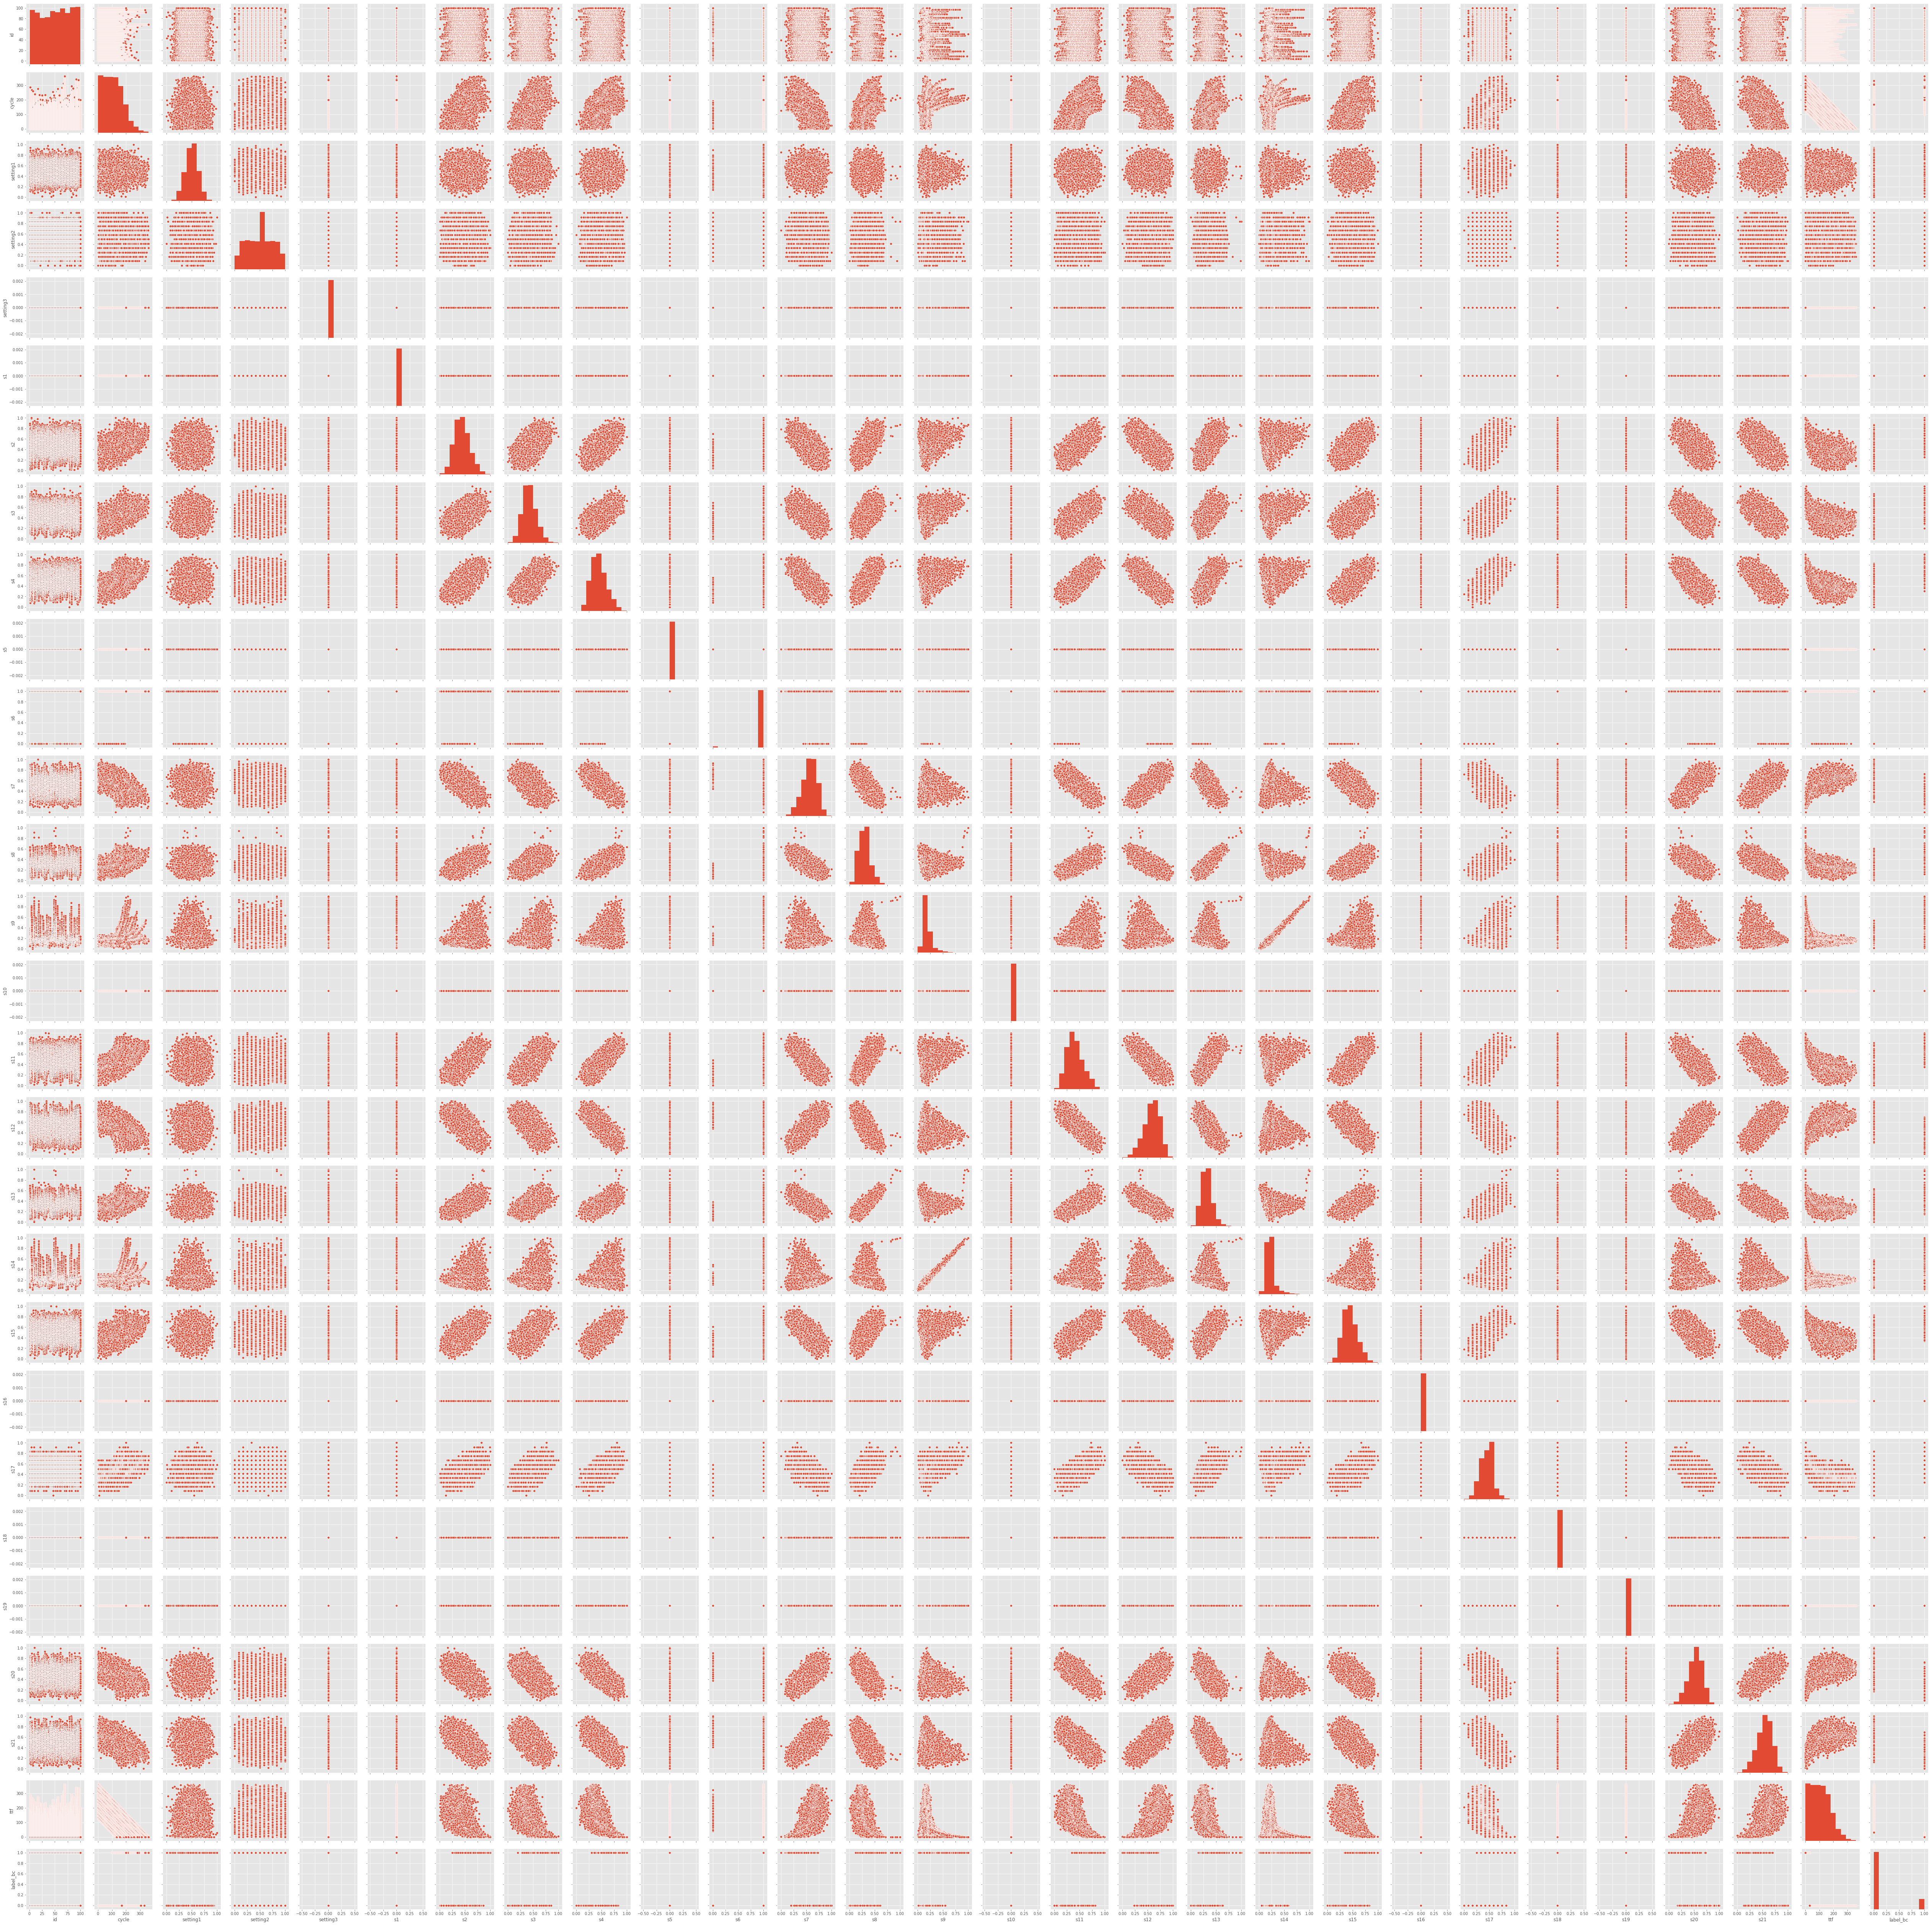

In [28]:
import seaborn as sns
sns.pairplot(df_train)

In [21]:
x_train = df_train.iloc[:,:-1].values
y_train = df_train.iloc[:,-1:].values

In [22]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train,y_train)

C:\Users\Sai Nidhi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Sai Nidhi\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [30]:
import joblib

In [31]:
joblib.dump(model, "engine_model.sav")

['engine_model.sav']

In [23]:
x_test = df_test.iloc[:,:-1].values
y_test = df_test.iloc[:,-1:].values

In [24]:
y_predlog = model.predict(x_test)

In [25]:
from sklearn.metrics import accuracy_score
accuracy_score(y_predlog,y_test)

0.9983200977397678

In [26]:
df_test['label_bc'].value_counts()

0    12764
1      332
Name: label_bc, dtype: int64

In [27]:
from sklearn.metrics import confusion_matrix
cm1 = confusion_matrix(y_test,y_predlog)
cm1

array([[12760,     4],
       [   18,   314]], dtype=int64)